In [ ]:
'''
【项目04】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('爱奇艺视频数据_utf8.csv', engine='python', encoding='utf-8')
data.head()

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0
1,2016年5月24日,NaN,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,NaN,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,NaN,7291.0,39492.0,70213917.0,NaN,32.0,1,32201.0
2,2016年5月24日,NaN,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,NaN,...,2005.0,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,NaN,1183.0,10105.0,3310768.0,NaN,30.0,1,8922.0
3,2016年5月24日,NaN,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,NaN,...,2006.0,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,NaN,451.0,2639.0,2088958.0,NaN,34.0,1,2188.0
4,2016年5月24日,NaN,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,NaN,...,2007.0,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,NaN,63551.0,748338.0,41287893.0,NaN,30.0,1,684787.0


In [3]:
#去除缺失值
def data_fillna(df):
    columns = df.columns
    for col in columns:
        if df[col].dtype == object:
            df[col].fillna('缺失数据',inplace=True)
        else:
            df[col].fillna(0, inplace=True)
    return df

#数据清洗
data_c = data_fillna(data)
data_c.head()

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,缺失数据,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,缺失数据,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,缺失数据,2034.0,32722.0,8069526.0,0.0,20.0,2,30688.0
1,2016年5月24日,缺失数据,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,缺失数据,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,缺失数据,7291.0,39492.0,70213917.0,0.0,32.0,1,32201.0
2,2016年5月24日,缺失数据,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,缺失数据,...,2005.0,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,缺失数据,1183.0,10105.0,3310768.0,0.0,30.0,1,8922.0
3,2016年5月24日,缺失数据,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,缺失数据,...,2006.0,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,缺失数据,451.0,2639.0,2088958.0,0.0,34.0,1,2188.0
4,2016年5月24日,缺失数据,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,缺失数据,...,2007.0,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,缺失数据,63551.0,748338.0,41287893.0,0.0,30.0,1,684787.0


In [4]:
#时间字段清洗
import re
def data_time_clean(df,col):
    df[col] = df[col].str.replace('年','.')
    df[col] = df[col].str.replace('月','.')
    df[col] = df[col].str.replace('日','')
    df[col] = pd.to_datetime(df[col])
    return df

data_c = data_time_clean(data_c,'数据获取日期')
data_c.head()

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016-05-24,缺失数据,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,缺失数据,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,缺失数据,2034.0,32722.0,8069526.0,0.0,20.0,2,30688.0
1,2016-05-24,缺失数据,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,缺失数据,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,缺失数据,7291.0,39492.0,70213917.0,0.0,32.0,1,32201.0
2,2016-05-24,缺失数据,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,缺失数据,...,2005.0,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,缺失数据,1183.0,10105.0,3310768.0,0.0,30.0,1,8922.0
3,2016-05-24,缺失数据,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,缺失数据,...,2006.0,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,缺失数据,451.0,2639.0,2088958.0,0.0,34.0,1,2188.0
4,2016-05-24,缺失数据,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,缺失数据,...,2007.0,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,缺失数据,63551.0,748338.0,41287893.0,0.0,30.0,1,684787.0


In [ ]:
'''
3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格
'''

In [5]:
#将导演的的数据合并，只保留好评数和评分人数
data_hp = data_c.groupby('导演').sum()[['好评数','评分人数']]
data_hp.head()

,好评数,评分人数
导演,,
Exact,89907.0,110087.0
John Fawcett Steve Dimarco Paul Fox,971384.0,1136255.0
Michael Cuesta,344880.0,395478.0
Michael Dinner,661184.0,840344.0
Michael Engler,31618.0,40999.0


In [6]:
#计算好评率
data_hp['好评率'] = data_hp['好评数'] / data_hp['评分人数']
data_hp.head()

,好评数,评分人数,好评率
导演,,,
Exact,89907.0,110087.0,0.816690
John Fawcett Steve Dimarco Paul Fox,971384.0,1136255.0,0.854900
Michael Cuesta,344880.0,395478.0,0.872059
Michael Dinner,661184.0,840344.0,0.786802
Michael Engler,31618.0,40999.0,0.771190


In [7]:
#排序并取Top20
data_hp_top20 = data_hp.sort_values('好评率', ascending=False)[:20]
data_hp_top20

,好评数,评分人数,好评率
导演,,,
王静,2800724.0,2801352.0,0.999776
萧锋,13447195.0,13454738.0,0.999439
向灼,2348852.0,2352694.0,0.998367
乌兰塔娜,12110879.0,12139127.0,0.997673
徐宗政,1964134.0,1971300.0,0.996365
欧凡,2574240.0,2584150.0,0.996165
肖光辉,326429.0,328414.0,0.993956
林添一,841653222.0,846803670.0,0.993918
张国立/罗长安,5353722.0,5393330.0,0.992656


In [8]:
#绘制图表的数据
data_hp_top20['好评率']

导演
王静         0.999776
萧锋         0.999439
向灼         0.998367
乌兰塔娜       0.997673
徐宗政        0.996365
欧凡         0.996165
肖光辉        0.993956
林添一        0.993918
张国立/罗长安    0.992656
刘逢声/林峰     0.992633
郭东旭        0.988149
毛尉光        0.988029
袁刚/成志超     0.987345
苏沅峰/张艺腾    0.987124
胡雪杨        0.985484
丁晓雄        0.985115
延艺         0.983942
潇庸         0.981788
白羽/陈迅      0.981205
张蠡/姜峰      0.980039
Name: 好评率, dtype: float64

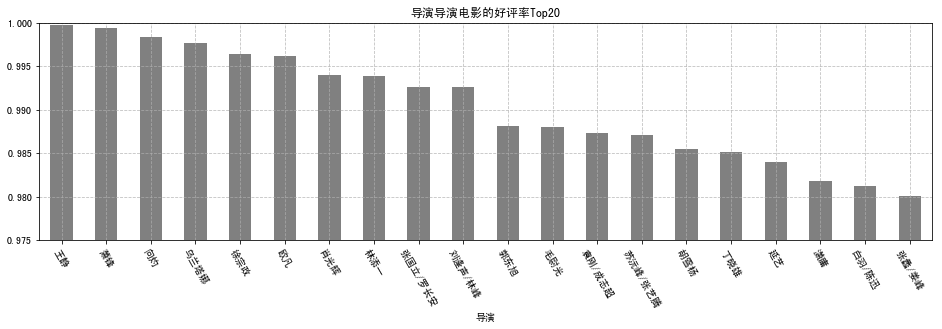

In [87]:
import matplotlib
matplotlib.rc('grid', alpha=0.8, linestyle='--', color='#b0b0b0', linewidth='0.8') 
#绘制图表
data_hp_top20['好评率'].plot(kind='bar',
                          figsize=(16,4),
                          ylim=[0.975,1.0],
                         color='gray',
                         grid=True,
                         rot=-60,
                         title='导演导演电影的好评率Top20')

In [114]:
data_q4 = data_c[['上映年份','评分人数','好评数']]
data_q4 = data_q4[data_q4['上映年份']!=0]
data_q4_1 = data_q4.groupby('上映年份').sum()
data_q4_1 = data_q4_1.sort_index()
data_q4_1.head()

,评分人数,好评数
上映年份,,
1937.0,84367.0,63120.0
1985.0,43535.0,32731.0
1986.0,39689.0,27977.0
1987.0,2483977.0,2354832.0
1988.0,261731.0,214513.0


In [110]:
data_q4_1_result = data_q4_1['评分人数'].loc[2001:]
data_q4_1_result

上映年份
2001.0    1.431608e+07
2002.0    7.363000e+07
2003.0    1.272277e+08
2004.0    2.059482e+08
2005.0    8.045964e+07
2006.0    1.354793e+08
2007.0    2.483689e+08
2008.0    1.220117e+08
2009.0    1.161470e+08
2010.0    8.706123e+08
2011.0    1.751053e+09
2012.0    7.974200e+07
2013.0    7.962352e+07
2014.0    1.723688e+08
2015.0    3.514291e+08
2016.0    5.216499e+07
Name: 评分人数, dtype: float64

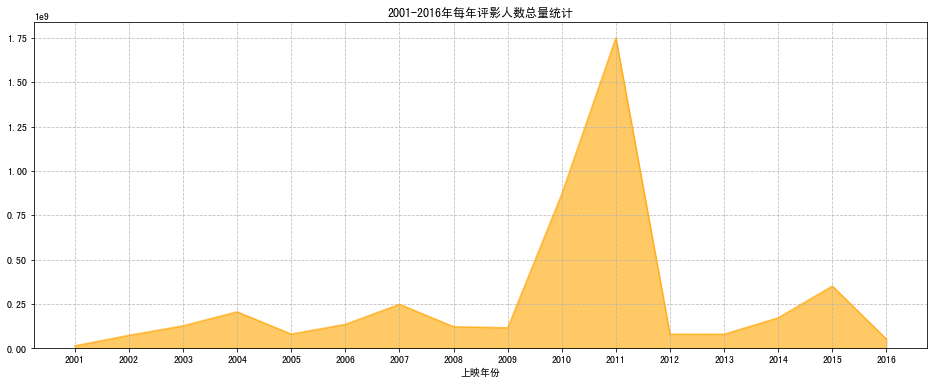

In [111]:
#创建面积图
data_q4_result.plot.area(figsize=(16,6),
                        color='orange',
                        grid=True,
                        alpha=0.6,
                        title='2001-2016年每年评影人数总量统计',
                        xticks=range(2001,2017))


,上映年份,评分人数,好评数
0,2004.0,32722.0,30688.0
1,2008.0,39492.0,32201.0
2,2005.0,10105.0,8922.0
3,2006.0,2639.0,2188.0
4,2007.0,748338.0,684787.0
5,2002.0,11529.0,9897.0
6,2004.0,124810.0,116452.0
9,2003.0,3378.0,2494.0
10,2012.0,7299.0,5631.0
11,2007.0,265.0,155.0


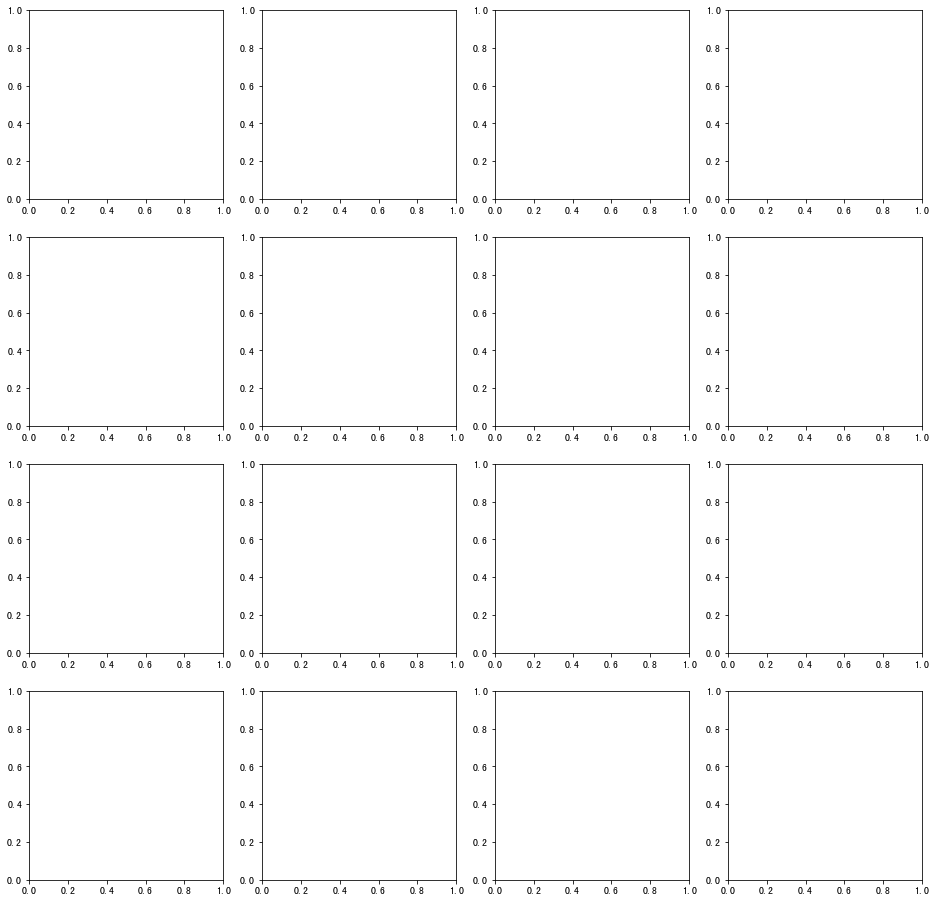

In [115]:
fig, axes = plt.subplots(4,4, figsize=(16,16))


data_q4.head(100)

# start_year = 2001
# for i in range(4):
#     for j in range(4):
#         data = data_q4[data_q4['上映年份']==start_year]
#         data.boxplot(whis=3,ax=axes(i,j))
#         start_year = start_year+1
        